## XBT Plotting

In this tutorial, we will show how to make simple depth profile plots from XBT data collected during a VirtualShip expedition. 

There are example plots embedded in this notebook, but these will ultimately be replaced by your own versions if you are working through the notebook with your own expedition output.

XBTs are relatively simple instruments which measure temperature as they fall through the water column, and can be useful for capturing vertical structure in the upper ocean.

### Set up

#### Imports

The first step is to import the Python packages required for post-processing the data and plotting. 

<div class="alert alert-block alert-success"> 
<b>Tip:</b> You may need to set the Kernel to the relevant (Conda) environment in the top right of this notebook to access the required packages! 
</div>

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import math

#### Data directory

Next, you should set `data_dir` to be the path to your expedition results in the code block below. You should replace `"/path/to/EXPEDITION/results/"` with the path for your machine.

<div class="alert alert-block alert-success"> 
<b>**TIP**:</b> You can get the path to your expedition results by navigating to the `results` folder in Terminal (using `cd`) and then using the `pwd` command. This will print your working directory which you can copy to the `data_dir` variable in this notebook. Don't forget to keep it as a string (in "quotation" marks)!
</div>

In [ ]:
# set data dir path

data_dir = "/path/to/EXPEDITION/results/"  # set this to be where your expedition output data is located on your (virtual) machine

#### Load data

We are now ready to read in the data using the `xarray` package. You can carry on executing the next cells without making changes to the code…

In [8]:
# load argo data

xbt_ds = xr.open_dataset(f"{data_dir}/xbt.zarr")

### Plotting

<div class="alert alert-block alert-info"> 
<b>**NOTE**:</b> The plots produced next are a starting point for your analysis. You are encouraged to make further adjustments and enhancements to suit your own data and research question.
</div>

We will now produce plot(s) of the XBT deployments. We will create a depth profile subplot for each deployment/waypoint, showing the temperature stucture of the water column at each location.

Here, depth is plotted on the y-axis and temperature on the x-axis. Can you spot the thermocline in the profiles? Are there any notable differences between the profiles at different deployment locations?

<div class="alert alert-block alert-success"> 
<b>**TIP**:</b> The maximum depth that the XBTs can record to in reality is controlled by the model of probe which is used. In VirtualShip, the default maximum depth is set to 285m, but this can be adjusted via the `virtualship plan` tool (see the _Instrument Configurations_ > _XBT_ section). Note, however, this does mean you would need to re-run the expedition to generate new data with the updated configuration.
</div>


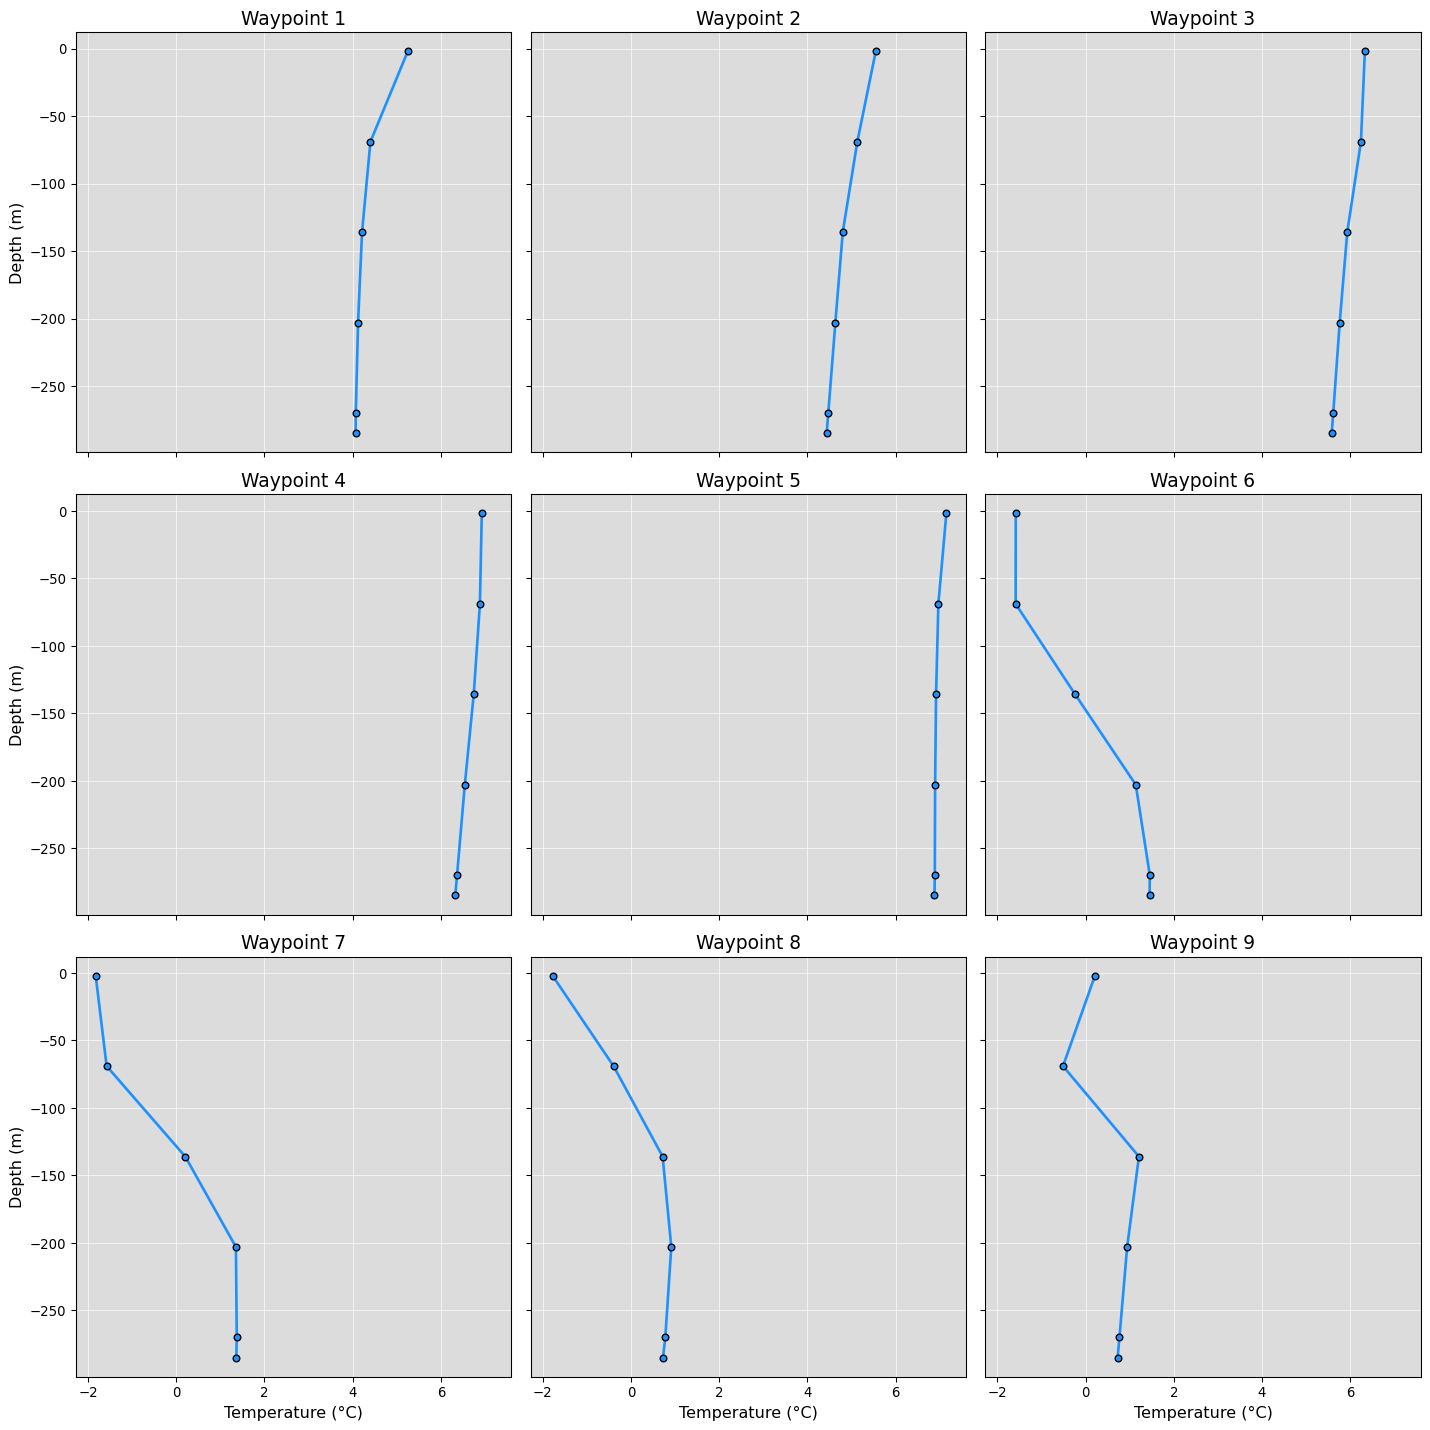

In [9]:
# make as 'square' a grid of subplots as possible
n_profiles = len(xbt_ds["temperature"])
ncols = math.ceil(math.sqrt(n_profiles))
nrows = math.ceil(n_profiles / ncols)

fig, axs = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(5 * ncols, 5 * nrows),
    squeeze=False,
    dpi=96,
    sharex=True,
    sharey=True,
)

for i, ax in enumerate(axs.flat):
    if i < n_profiles:
        profile = xbt_ds.isel(trajectory=i)

        # plot
        ax.scatter(
            profile["temperature"],
            profile["z"],
            color="dodgerblue",
            edgecolors="black",
            s=25,
            zorder=3,
        )
        ax.plot(
            profile["temperature"], profile["z"], color="dodgerblue", lw=2, zorder=2
        )

        # extras
        ax.set_title(f"Waypoint {int(profile['trajectory'].values) + 1}", fontsize=14)
        ax.set_facecolor("gainsboro")
        ax.grid(visible=True, which="both", color="white", linewidth=0.5)

        # y-label on leftmost column
        if i % ncols == 0:
            ax.set_ylabel("Depth (m)", fontsize=12)
        else:
            ax.set_ylabel("")

        # x-label on bottom row
        if i // ncols == nrows - 1:
            ax.set_xlabel("Temperature (°C)", fontsize=12)

        else:
            ax.set_xlabel("")
    else:
        ax.axis("off")  # turn off unused subplots

plt.tight_layout()